<center>
<img src="https://i.ibb.co/Ycs11Fg/meme.jpg">
</center>

# Андан на экономе: домашнее задание 3
## Задача классификации

**ФИО:**
Земцов Денис Романович

## Общая информация


__Дата выдачи:__ 14.04.2023

__Мягкий дедлайн:__ 23:59MSK 07.05.2023

__Жесткий дедлайн:__ 23:59MSK 14.05.2023

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 100 баллов. За каждый день просрочки после мягкого дедлайна снимается 10 баллов. После жёсткого дедлайна работы не принимаются. Даже при опозданиии на одну секунду. Сдавайте работы заранее.

Мягкий дедлайн можно отодвинуть без потери баллов на 1,2 или 3 дня. Суммарно для откладывания в запасе есть три дня. Можно отодвинуть один дедлайн на три дня, а можно три дедлайна подвинуть на один день. Распоряжаться этими днями студент может как угодно. Жёсткий дедлайн, при этом, не меняется. Если такое произошло, нужно сообщить о сдвиге при сдаче работы.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Любой из студентов может быть вызван на защиту любого домашнего задания. В таком случае итоговая оценка студента определяется в результате защиты.

> За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено. 

> Выводы должны быть релевантными. Не забывайте их писать. Если в вопросе требуется ответ словами, а его нет, вы будете терять довольно много баллов.

> Фиксируйте все seed'ы, random_state'ы и тд - ваш код должен быть воспроизводим с теми же результатами.

## Формат сдачи

Сам ноутбук называйте в формате hw-03-USERNAME.ipynb, где USERNAME — ваши фамилия и имя. Файл сдаётся в anytask.

## Импорт необходимых библиотек 

Импортируйте все используемые библиотеки здесь.

In [2]:
# Ваш код здесь
import numpy as np
import pandas as pd
import datetime
import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import sklearn.model_selection
import random
# Отключение некоторых лишних предупреждений
import warnings
warnings.filterwarnings("ignore")

## Задача 

В данном задании вам необходимо построить предсказательную модель, определяющую пол клиента по его банковским транзакциям.

Вам доступны 2 файла:
* __transaction.csv__ - файл с транзакциями, колонки:
    * user_id - целочисленный идентификатор пользователя
    * dt - дата и время совершения транзации, принцип кодирования: "DAY TIME"
        * DAY - порядковый день транзации с начала сбора данных
        * TIME - время в формате hh:mm:ss
    * type - тип (категория) совершаемой транзакции
    * value - сумма транзакции
    
* __gender.csv__ - файл с данными о полах клиентов.
    * user_id - целочисленный идентификатор пользователя
    * gender - целевая переменная, закодированная лейблами 0 и 1. Это сделано:
        * a) для удобства
        * б) для избежания холиваров о правильности исходных меток 

Но если вы вдруг захотите похоливарить о том, что метки только две - то заметьте, что о полноте данных мы тоже не утверждаем.

# Часть 1: минималочка [макс 20 баллов]

В этой части мы с вами попробуем построить самую простую модель для предсказания.

Как мы с вами увидим: главная сложность - правильная подготовка данных. В таких задачах то, как именно вы преобразуете данные для обучения модели и будет во много определять её качество.

В этой части мы сделаем простое преобразование данных путём простой агрегации данных о величине транзакций. 

## Загрузка данных [5 баллов] 

Скачайте данные для задачи с Яндекс.Диска:
https://disk.yandex.ru/d/DGy6bbLaMZmrQg.

Загрузите файлы с транзакциями и целевой меткой в pd.DataFrame.

__Внимание__: у файла transactions.csv колоночный разделитель - точка с запятой ";"

In [3]:
# Ваш код здесь
# метод взял вот тут: https://ru.stackoverflow.com/questions/1088300/%D0%BA%D0%B0%D0%BA-%D1%81%D0%BA%D0%B0%D1%87%D0%B8%D0%B2%D0%B0%D1%82%D1%8C-%D1%84%D0%B0%D0%B9%D0%BB%D1%8B-%D1%81-%D1%8F%D0%BD%D0%B4%D0%B5%D0%BA%D1%81-%D0%B4%D0%B8%D1%81%D0%BA%D0%B0
import requests
import urllib
import json

def get_file(file_url):
  folder_url = 'https://disk.yandex.ru/d/DGy6bbLaMZmrQg'
  url = ('https://cloud-api.yandex.net/v1/disk/public/resources/download' + '?public_key='
 + urllib.parse.quote(folder_url) + '&path=/' + urllib.parse.quote(file_url))
  r = requests.get(url) # запрос ссылки на скачивание
  h = json.loads(r.text)['href'] # 'парсинг' ссылки на скачивание
  return(h)
df_trans = pd.read_csv(get_file('transactions.csv'), sep = ';')
df_gen = pd.read_csv(get_file('gender.csv'))

In [4]:
df_gen

,user_id,gender
0,6740969,1.0
1,36599781,0.0
2,91453656,1.0
3,17431962,1.0
4,72568668,1.0
...,...,...
8395,93715144,1.0
8396,51502229,0.0
8397,77655748,1.0
8398,87819773,1.0


In [5]:
df_trans

,user_id,dt,type,value
0,39026145,0 10:23:26,"Звонки с использованием телефонов, считывающих...",2695.099
1,39026145,6 07:08:31,"Звонки с использованием телефонов, считывающих...",2358.212
2,39026145,8 07:06:10,"Звонки с использованием телефонов, считывающих...",2807.395
3,39026145,11 08:49:03,"Звонки с использованием телефонов, считывающих...",2695.099
4,39026145,11 14:12:08,"Звонки с использованием телефонов, считывающих...",2695.099
...,...,...,...,...
2282462,71902723,290 15:12:09,Агенты и менеджеры по аренде недвижимости,2133.620
2282463,71942984,248 00:00:00,Агенты и менеджеры по аренде недвижимости,1870.848
2282464,71942984,375 00:00:00,Агенты и менеджеры по аренде недвижимости,2466.016
2282465,74289663,27 00:00:00,Агентства по аренде автомобилей,1445.831


In [6]:
df_trans.isna().sum()

print(len(set(df_gen['user_id'])&set(df_trans['user_id'])))

8356





## Подготовка данных [10 баллов] 

Для данной задачи необходимо как-то собрать данные для каждого пользователя в один вектор (строку таблицы). Сейчас, как вы можете увидеть, в таблице с данными одному пользователю может соответствовать много строк (каждая операция - отдельная строка).

Таким образом, необходима агрегация данных - это можно сделать множеством разных способов.

### Агрегация 

Произведите простую агрегацию данных и для каждого пользователя в качестве признаков получите сумму, среднее и стандартное отклонение величины его транзакций. 

Так же добавите для каждого пользователя колонку с таргетом.

По итогу вы должны получить таблицу с колонками:
* user_id
* value_sum
* value_mean
* value_std
* gender

In [7]:
# Ваш код здесь
df_sup = df_gen.merge(df_trans, how = 'left') #Мерджанул по фану
df_sup = df_sup.dropna()
df = pd.DataFrame()
df_supp = df_gen.set_index('user_id')
df.index = df_gen['user_id'] #создал новенькую штучку
df['value_sum'] = df_trans.groupby('user_id')['value'].sum()
df['value_mean'] = df_trans.groupby('user_id')['value'].mean() #Делаю колонки через групбай, поэтому индекс это юзер айди
df['value_std'] = df_trans.groupby('user_id')['value'].std() 
df.insert(3, 'gender', df_supp['gender']) #нагуглил документацию инсерта
df = df.dropna(axis = 0,subset = 'value_mean') #удалил строки, о которых не было данных о транзакциях
df = df.fillna(0) #Заполнил нулями стандартные ошибки там, где только одно наблюдение нулём
df

,value_sum,value_mean,value_std,gender
user_id,,,,
6740969,996602.640,2171.247582,718.691164,1.0
36599781,2227630.566,2175.420475,645.511317,0.0
91453656,137064.806,2363.186310,684.686030,1.0
17431962,1112047.619,2118.185941,717.894125,1.0
72568668,533183.043,1974.752011,745.930038,1.0
...,...,...,...,...
93715144,115187.587,2258.580137,582.322640,1.0
51502229,588940.268,2126.138152,648.121314,0.0
77655748,1997426.562,2432.919077,515.688715,1.0


In [8]:
df['value_sum'] = df['value_sum'].apply(lambda x: '{:.0f}'.format(x))
df['value_sum'] = df['value_sum'].astype(int)

array([[<Axes: title={'center': 'value_sum'}>,
        <Axes: title={'center': 'value_mean'}>],
       [<Axes: title={'center': 'value_std'}>,
        <Axes: title={'center': 'gender'}>]], dtype=object)

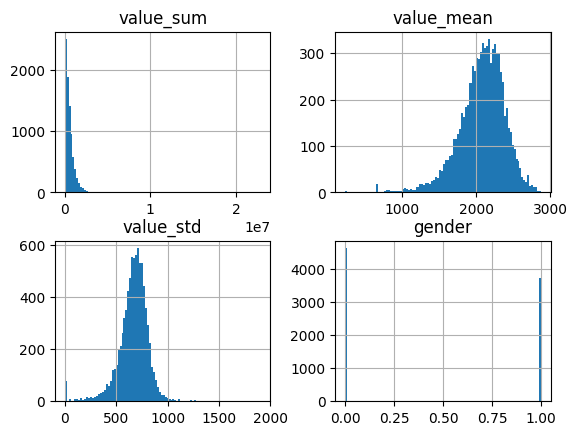

In [9]:
df.hist(df.columns, bins=100, )

array([[<Axes: title={'center': 'value_sum'}>]], dtype=object)

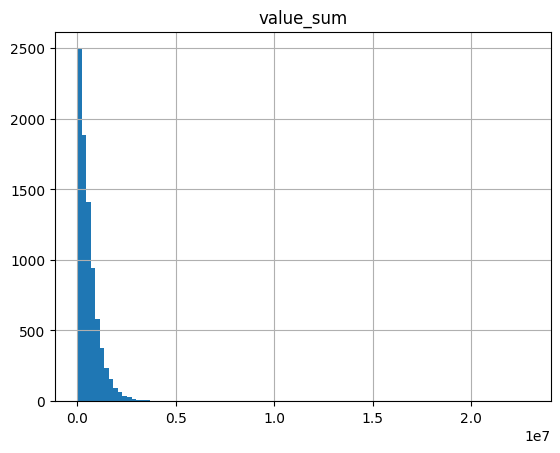

In [10]:
df.hist('value_sum', bins = 100)

### Отложенная выборка 

Получите полный список пользователей и разделите их на два списка:
* тренировочный список пользователей (80%)
* тестовый список пользователей (20%)

__Важное замечание__: Далее во всех пунктах, где вам нужно провалидировать (оценить) получившуюся модель исползуйте данные только для этих тестовых пользователей.

Обучать все модели, естественно, нужно только на данных пользователей из обучающего списка.

In [11]:
from pandas.core.common import random_state
# Ваш код здесь
df_train, df_test = sklearn.model_selection.train_test_split(df, test_size = 0.2, stratify = df['gender'], random_state=222) #Разбил по функции из семинара

Для нашей задачи получите признаки и целевые метки обучающей и тестовой выборки. 

In [12]:
# Ваш код здесь
y_train = df_train['gender'] #Целевые метки
y_test = df_test['gender']
x_train = df_train.drop('gender', axis = 1)
x_test = df_test.drop('gender', axis = 1)



## Обучение и оценка модели [5 баллов] 

Обучите модель логистической регрессии с дефолтными параметрами.

Получите предсказания вероятностей первого класса.

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score

y_pred = np.zeros_like(y_test)
accuracy_score(y_test,y_pred)

0.5538277511961722

array([[<Axes: title={'center': 'value_sum'}>,
        <Axes: title={'center': 'value_mean'}>],
       [<Axes: title={'center': 'value_std'}>, <Axes: >]], dtype=object)

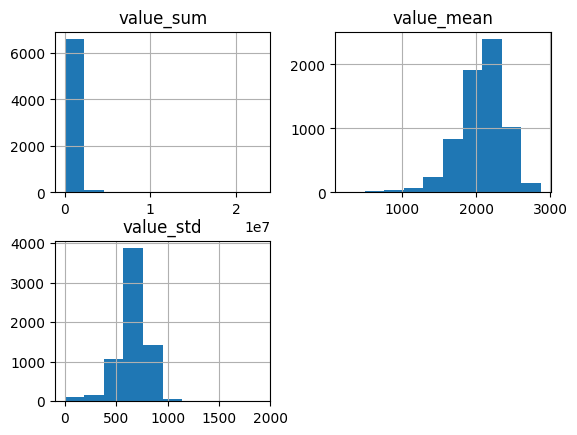

In [14]:
x_train.hist()

In [15]:
# Ваш код здесь

model = LogReg()
model.fit(x_train, y_train)
y_pred_prob = model.predict_proba(x_test)
y_pred = model.predict(x_test)
y_pred_prob
model.coef_

array([[ 1.13671143e-07, -1.32872282e-04, -3.51884993e-05]])

### Валидация 

Посчитайте ROC_AUC, accuracy, precision, recall для получившихся предсказаний.

Для метрик, для которых необходимы метки классов, а не вероятности - используйте порог 0.5.

Далее при оценки других моделей приводите эти же метрики (если явно не указано иное).

In [16]:
# Ваш код здесь
accuracy = accuracy_score(y_test,y_pred)
roc_auc = sklearn.metrics.roc_auc_score(y_test, y_pred_prob[:,-1])
prec = sklearn.metrics.precision_score(y_test,y_pred)
recall = sklearn.metrics.recall_score(y_test, y_pred)
print(f'accuracy: {accuracy}, roc_auc:{roc_auc}, precision:{prec}, recall:{recall}')

accuracy: 0.5586124401913876, roc_auc:0.546483332271756, precision:0.75, recall:0.0160857908847185


### Вывод

Как вы оцениваете качество получившейся модели и возможные причины такого качества?

__Ваш вывод:__
Модель не очень хорошего качество, так как все метрики примерно на уровне предсказания самого частого класса. Это может быть из-за того, что данные о покупках имеют очень высокие значения и не являются нормальными. Также эти данные про одну величину для каждого из покупателей, что тяжело использовать для предсказания такой сложной целевой метки.

# Часть 2: мб сделаем что-то более серьёзное? [макс 20 баллов]

Давайте попробуем улучшить качество решения задачи за счёт другого метода подготовки данных.

Ранее мы использовали простое преобразование, когда каждый клиент описывался только 3 значениями.
Давайте сделаем что-то более сложное и попробуем добавить больше данных о клиенте для модели.

## Подготовка данных [15 баллов]

Воспользуемся тем, что каждая транзакция у нас имеет свой тип - это уж точно более информативно, чем агрегация по всем транзакциям.

Создайте сводную таблицу, где для каждого клиента (строка) будут указаны его суммарные траты на каждую категорию (столбец). Таким образом, вы должны получить таблицу с числом строк равным количеству клиентов и числом столбцов - количеству категорий трат. Каждая ячейка должна содержать суммарные траты данного клиента в данной категории.

__Подсказка__: у DataFrame есть полезный метод `pivot_table`.

In [17]:
# Ваш код здесь
df_piv = pd.pivot_table(df_sup, index = 'user_id', values = 'value', columns = 'type', aggfunc = 'sum') #Сделал через pd.pivot_table, потому что так делал в прошлой домашке.
df_piv = df_piv.fillna(0) #заполнил траты, которых не было Нулём.
df_piv.insert(0, 'gender', df_supp['gender']) #нагуглил документацию инсерта
df_piv

type,gender,"Авиалинии, авиакомпании","Авиалинии, авиакомпании, нигде более не классифицированные",Автобусные линии,Автозапчасти и аксессуары,Автоматизированные бензозаправки,Автомойки,Автошины,"Агентства по автотранспортным перевозкам, местные/дальные автогрузоперевозки, компании попереезду и хранению, местная доставка",Агентства по аренде автомобилей,...,"Фотостудии, фотолаборатории","Химикалии и смежные вещества, не классифицированные ранее",Химчистки,Ценные бумаги: брокеры/дилеры,Центры здоровья,"Цифровые товары, игры",Школы — бизнес и секретарей,Штрафы,"Штучные товары, галантерея и другие текстильные товары",Электрические части и оборудование
user_id,,,,,,,,,,,,,,,,,,,,,
22899,1.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
27914,1.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
28753,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
31385,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
38084,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99953525,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
99967537,1.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
99988578,1.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4267.24,0.0,0.0,0.0,0.0


## Обучение и валидация модели [5 баллов]

Аналогично предыдущей части разделите данные на обучающую и тестовую выборку (80%/20%), обучите модель на дефолтных параметрах и оцените качество.

In [18]:
# Ваш код здесь
df_train_1, df_test_1 = sklearn.model_selection.train_test_split(df_piv, test_size = 0.2, stratify = df_piv['gender'], random_state=222) #Разбил по функции из семинара
y_train_1 = df_train_1['gender'] #Целевые метки
y_test_1 = df_test_1['gender']
x_train_1 = df_train_1.drop('gender', axis = 1)
x_test_1 = df_test_1.drop('gender', axis = 1)

In [19]:
model = LogReg()
model.fit(x_train_1, y_train_1)
y_pred_prob_1 = model.predict_proba(x_test_1)
y_pred_1 = model.predict(x_test_1)

In [20]:
accuracy = accuracy_score(y_test_1,y_pred_1)
roc_auc = sklearn.metrics.roc_auc_score(y_test_1, y_pred_prob_1[:,-1])
prec = sklearn.metrics.precision_score(y_test_1, y_pred_1)
recall = sklearn.metrics.recall_score(y_test_1, y_pred_1)
print(f'accuracy: {accuracy}, roc_auc:{roc_auc}, precision:{prec}, recall:{recall}')

accuracy: 0.7236842105263158, roc_auc:0.784525388103, precision:0.71580547112462, recall:0.631367292225201


### Вывод 

Изменилось ли качество модели? Почему?

__Ваш вывод:__
Качество выросло сильно, так как можно понять, на какие категории представители разных гендеров тратят больше/меньше денег. Как именно распределены их траты среди разных категорий, какие траты совершаются совместно, а какие - нет. Следовательно: больше репрезентативных независимых данных - лучше метрики.

# Часть 3: что мы всё про данные? Давайте про модель 
# [макс 30 баллов]

Ранее мы работали только над подготовкой обучающей выборки. Давайте теперь попробуем изменить модель, чтобы добиться наилучшего качества. 

Входные данные для этой части - выборка с предыдущей.

## Нормирование данных [5 баллов] 

Как мы знаем, линейные модели любят нормированные данные.

Приведите значения всех признаков в отрезок [0, 1]

__Замечание__: если вы используете метод, который удаляет информацию о названиях колонок - сохраните эти названия в отдельную переменную, вам это потом может понадобиться.

In [21]:
features = list(x_train_1.columns.values)

In [22]:
# Ваш код здесь
column_transformer = ColumnTransformer([
    ('scaling', StandardScaler(), features)   
])

x_train_1 = column_transformer.fit_transform(x_train_1)
x_test_1 = column_transformer.transform(x_test_1)

In [23]:
x_train_1.std() #Чекнул как работает, отнормировалось или нет (отнормировалось)

1.0

## Подбор параметров [15 баллов]

Подберите наилучшие параметры для модели линейной регрессии. Важные уточнения:

* используйте перебор по сетке
* в качестве метрики используйте ROC AUC
* для оценки параметров делайте кросс-валидацию на 4 фолдах

__Замечание__: у линейной регрессии множество доступных значений для некоторых параметров зависит от метода оптимизации (solver). Например, lbfgs-алгоритм не подерживает l1-регуляризацию.

Поэтому действуйте шагами: сначала подберите solver, а потом уже переберите доступные для него параметры.

In [24]:
# Ваш код здесь
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
model_lr = LogReg()
solver = ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga')
searcher_solver = GridSearchCV(model_lr, [{"solver": solver}],
                        scoring="roc_auc", cv=4, n_jobs=-1)
searcher_solver.fit(x_train_1, y_train_1) #Перебрал солверы с обычными параметрами(но возможно это не супер правильно, 
#так как с наилучшими параметрами score модели другого солвера может быть больше)

best_solver = searcher_solver.best_params_["solver"]
print(best_solver)
model_lr = LogReg(solver = best_solver, random_state = 222) #выбрал elasticnet потому что таким образом возможно сравнить penalty
#Вычитал в документации Лог регрессии


saga


In [28]:
Cis = np.linspace(0, 0.1, 100)
penalty = ['l1', 'l2', 'elasticnet', None]
searcher_param = GridSearchCV(model_lr, {"C": Cis , "penalty": penalty},
                              scoring = "roc_auc", cv = 4, n_jobs=-1) #С джобсами использую просто все ресурсы, чтобы всё быстрее училось
searcher_param.fit(x_train_1, y_train_1)
best_penal = searcher_param.best_params_

In [29]:
best_penal

{'C': 0.023232323232323233, 'penalty': 'l1'}

In [36]:
best_model = searcher_param.best_estimator_
y_pred_2 = best_model.predict(x_test_1)
y_pred_prob_2 = best_model.predict_proba(x_test_1)[:,-1]


accuracy = accuracy_score(y_test_1,y_pred_2)
roc_auc = sklearn.metrics.roc_auc_score(y_test_1, y_pred_prob_2)
prec = sklearn.metrics.precision_score(y_test_1, y_pred_2)
recall = sklearn.metrics.recall_score(y_test_1, y_pred_2)
print(f'accuracy: {accuracy}, roc_auc:{roc_auc}, precision:{prec}, recall:{recall}')

accuracy: 0.6901913875598086, roc_auc:0.7862075055443286, precision:0.7533333333333333, recall:0.4544235924932976


Оцените качество лучшей модели на тестовых данных аналогично предыдущим задачам.

В данной модели лишь немного выше целевая метрика обучения(roc_auc), значительно выше precision, однако accuracy упала на такую же величину, а recall ещё сильнее. Recall очень низкий => это возможно из-за того, что при предсказании мы выбираем неверный порог решения(0.5) и нужно это изменить.

Получилось ли добиться лучше качества при подборе параметров?
Почему так? 

Для чего мы использовали одновременно кросс-валидацию и отложенную тестовую выборку?

__Ваш вывод__:Для того, чтобы посмотреть на то, можем ли мы доверять результатам кросс-валидации, так как может быть такое, что модель переобучилась и нужно это как-то отслеживать, плюс при подборе параметров мы используем только обучающую выборку, качество модели нельзя оценивать на данных, которые участвовали в её обучении или подборе параметров, это может привести к переобучению.

## Подбор отсечения [5 баллов]

Ранее мы работали или с вероятностями из модели или с метками, полученных при отсечении по веростности с порогом 0.5.

Стоит сказать, что порог 0.5 для разделения классов не всегда самый лучший. Часто нам нужно так подобрать порог, чтобы удовлетворить наши требования по точности и полноте.

Давайте подберём порог, который максимизирует F_beta меру при условии, что нам полнота в 5 раз важнее точности.

Вычислите наилучший порог и нарисуйте график зависимости этой метрики от порога разделения.

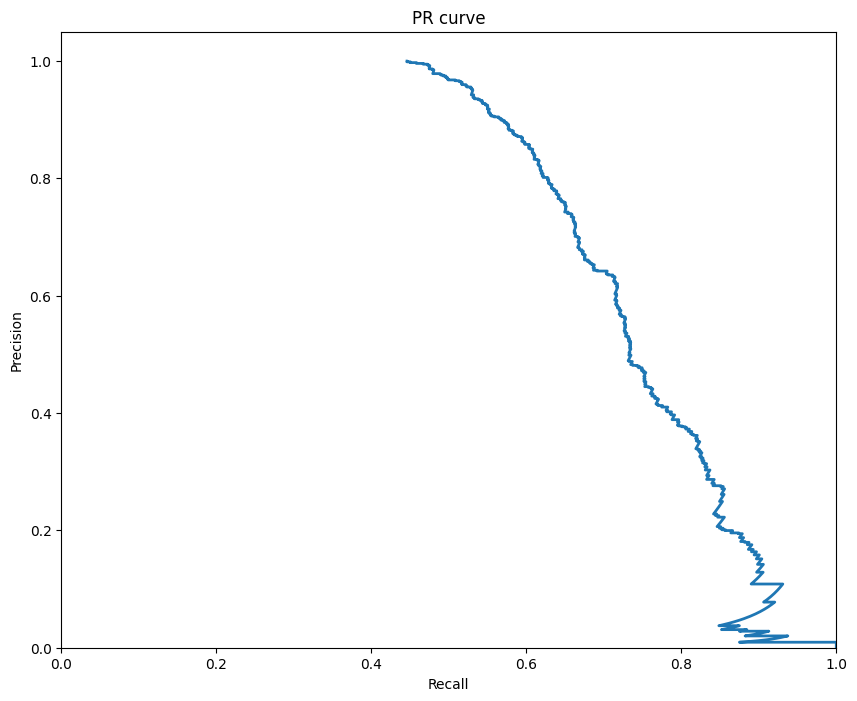

NameError: ignored

In [44]:
# Ваш код здесь
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import fbeta_score


plt.figure(figsize=(10, 8))
precision, recall, thresholds = precision_recall_curve(y_test_1, y_pred_prob_2, pos_label=1)
lw = 2
plt.plot(precision, recall, lw=lw, label='ROC curve ')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.show()


In [ ]:
thres = np.linspace(0, 1, 100)



## Интерпретация модели [5 баллов]

Часто нам хочется интерпритировать предсказания модели - понять, как наши признаки влияют на её ответ.
В случае сложных моделей сделать это не просто - чем сложнее модель, тем более сложные закономерности она извлекает и тем тяжелее нам их понять.

Но в случае линейной регресии это просто сделать, посмотрев на её обучаемые параметры (вспоминайте!).

Получите список признаков, которые увеличивают вероятность метки 0.
Аналогично для метки 1.

In [ ]:
# Ваш код здесь

In [ ]:
# Ваш код здесь

# Часть 4: ва-банк / пространство для творчества [макс 30 баллов]

Добейтесь максимального качества, больше качество - больше баллов.

Стратегия подготовки данных и обучения модели на ваше усмотрение.

Условия:
* Оценка на отложенной тестовой группе пользователей, использовавшейся в прошлых пунктах (20%)
* В качестве метрики используйте ROC_AUC

__Замечание__: 

Ответа на вопрос "какое нужно качество для максимального балла?" не будет.

Используйте все свои знания, чтобы добиться наилучшего результата.

In [45]:
# Ваш код здесь

!pip install catboost
!pip install --user --upgrade ipywidgets
!pip install --upgrade numpy
!jupyter nbextension enable --py widgetsnbextension

import catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 6.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.3/138.3 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.5 MB/s eta 0:00:00


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 9.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 29.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconf

In [ ]:
import catboost
from catboost import CatBoostClassifier
#Позаимствовал алгоритм градиентного бустинга  из библиотеки яндекса catboost
#https://www.youtube.com/watch?v=xl1fwCza9C8
#Ссылка на ролик выше, плюс смотрел документацию на сайте: https://catboost.ai/en/docs/


nice_model = CatBoostClassifier(eval_metric= "AUC",
                                random_seed = 222)
param_grid = {'learning_rate': [0.03, 0.05, 0.1],
        'depth': [4, 6, 10, 12],
        'l2_leaf_reg': [1, 3, 5, 7]}

grid_result = nice_model.grid_search(param_grid, 
            x_train_1,
            y = y_train_1,
            cv=4,
            partition_random_seed=0,
            calc_cv_statistics=True,
            search_by_train_test_split=True,
            refit=True,
            shuffle=True,
            stratified=True,
            verbose=25) #Затьюнил параметры деревьев в алгоритме бустинге, ну так, навскидку



Выходные данные были обрезаны до нескольких последних строк (5000).
231:	test: 0.8366467	best: 0.8366761 (230)	total: 1m 13s	remaining: 4m 2s
232:	test: 0.8365812	best: 0.8366761 (230)	total: 1m 13s	remaining: 4m 1s
233:	test: 0.8365699	best: 0.8366761 (230)	total: 1m 13s	remaining: 4m 1s
234:	test: 0.8366196	best: 0.8366761 (230)	total: 1m 13s	remaining: 4m
235:	test: 0.8366038	best: 0.8366761 (230)	total: 1m 14s	remaining: 4m
236:	test: 0.8368094	best: 0.8368094 (236)	total: 1m 14s	remaining: 3m 59s
237:	test: 0.8370850	best: 0.8370850 (237)	total: 1m 14s	remaining: 3m 59s
238:	test: 0.8371325	best: 0.8371325 (238)	total: 1m 15s	remaining: 3m 59s
239:	test: 0.8372002	best: 0.8372002 (239)	total: 1m 15s	remaining: 3m 58s
240:	test: 0.8371663	best: 0.8372002 (239)	total: 1m 15s	remaining: 3m 58s
241:	test: 0.8374736	best: 0.8374736 (241)	total: 1m 15s	remaining: 3m 57s
242:	test: 0.8375459	best: 0.8375459 (242)	total: 1m 16s	remaining: 3m 57s
243:	test: 0.8376815	best: 0.8376815 (243)	

In [ ]:
final_prob = nice_model.predict_proba(x_test_1)[:,-1] #Сразу предикчу, потому что модель уже обучена во время grid_search
roc_auc = sklearn.metrics.roc_auc_score(y_test_1, final_prob)
#вот такой вот результат